In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
 


In [319]:
df = pd.read_csv("Crime Prediction in Chicago_Dataset.csv")

## Exploring the dataset

In [320]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [322]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [323]:
df = df.drop(columns='ID' , axis = 1)

In [324]:
df = df.drop(columns='Case Number', axis=1)

In [325]:
df['Date'] = pd.to_datetime(df['Date'])

In [326]:
df.describe()

,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,239558,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,2022-07-11 20:58:27.807963136,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
min,2022-01-01 00:00:00,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,2022-04-18 14:41:15,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,2022-07-17 03:37:30,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,2022-10-06 14:00:00,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,2022-12-31 23:55:00,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532
std,NaN,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010


In [327]:
df['Arrest'].isnull().sum()

0

In [ ]:
df['Arrest'].value_counts()
#the data is imbalanced, so we can handle it by class weight  method

Arrest
False    211505
True      28053
Name: count, dtype: int64

In [329]:
df.duplicated().sum()

374

## Data Cleaning

In [330]:
df.drop_duplicates()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,1,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,2433,24,48.0,77,01A,1167747.0,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)"
239554,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1235,12,25.0,31,01A,1173423.0,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)"
239555,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,511,5,9.0,49,01A,1178641.0,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)"
239556,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,10,22.0,30,01A,1149162.0,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)"


In [331]:
df.isnull().sum()

Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

## Encoding Categorical Features

In [332]:
# Label Encoding
le = LabelEncoder()
df['Arrest'] = le.fit_transform(df['Arrest'])

In [333]:
df['Arrest'].value_counts()

Arrest
0    211505
1     28053
Name: count, dtype: int64

In [334]:
le1 = LabelEncoder()
df['Domestic'] = le1.fit_transform(df['Domestic'])
df['Domestic'].value_counts()

Domestic
0    194642
1     44916
Name: count, dtype: int64

In [335]:
le2 = LabelEncoder()
df['Block'] = le2.fit_transform(df['Block'])
df['Block'].value_counts()

Block
714      604
486      575
26311    342
1458     325
245      276
        ... 
19071      1
448        1
13759      1
9932       1
494        1
Name: count, Length: 27969, dtype: int64

In [336]:
le3 = LabelEncoder()
df['IUCR'] = le3.fit_transform(df['IUCR'])
df['IUCR'].value_counts()

IUCR
284    20112
285    18882
232    18692
293    17151
47     14236
       ...  
79         1
86         1
129        1
44         1
246        1
Name: count, Length: 305, dtype: int64

In [337]:
le4 = LabelEncoder()
df['Location Description'] = le4.fit_transform(df['Location Description'])
df['Location Description'].value_counts()

Location Description
119    67640
17     45748
102    30603
115    12059
94      9333
       ...  
49         1
120        1
123        1
100        1
118        1
Name: count, Length: 136, dtype: int64

In [338]:
le2 = LabelEncoder()
df['Primary Type'] = le2.fit_transform(df['Primary Type'])
df['Primary Type'].value_counts()

Primary Type
29    54886
2     40946
5     27248
16    21463
1     20809
8     16854
22    14609
26     8963
30     8780
3      7593
17     4756
7      4223
20     1870
6      1583
27     1216
10      732
25      711
28      452
0       422
12      392
23      283
15      203
13      184
4       177
14      117
19       47
11       13
9         9
21        7
18        5
24        5
Name: count, dtype: int64

In [339]:
le2 = LabelEncoder()
df['Description'] = le2.fit_transform(df['Description'])
df['Description'].value_counts()

Description
231    27225
183    20112
0      18882
103    18692
68     17151
       ...  
222        1
198        1
12         1
227        1
279        1
Name: count, Length: 285, dtype: int64

In [340]:
le2 = LabelEncoder()
df['FBI Code'] = le2.fit_transform(df['FBI Code'])
df['FBI Code'].value_counts()

FBI Code
23    54886
5     33963
10    27248
24    21463
4     17582
20    15634
7     14196
21     8963
11     8962
22     7593
3      7492
2      7280
14     4759
6      2552
16     1804
13     1677
19     1089
0       725
17      659
25      422
12      283
18      203
9        76
8        30
15       10
1         7
Name: count, dtype: int64

In [341]:
le2 = LabelEncoder()
df['Updated On'] = le2.fit_transform(df['Updated On'])
df['Updated On'].value_counts()

Updated On
95     227160
262      2069
113       556
115       555
109       544
        ...  
335         1
920         1
333         1
411         1
383         1
Name: count, Length: 1425, dtype: int64

In [342]:
le2 = LabelEncoder()
df['Location'] = le2.fit_transform(df['Location'])
df['Location'].value_counts()

Location
118347    4667
110255     315
72627      285
73085      252
41384      225
          ... 
72325        1
86601        1
10442        1
21918        1
2817         1
Name: count, Length: 118348, dtype: int64

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  239558 non-null  datetime64[ns]
 1   Block                 239558 non-null  int32         
 2   IUCR                  239558 non-null  int32         
 3   Primary Type          239558 non-null  int32         
 4   Description           239558 non-null  int32         
 5   Location Description  239558 non-null  int32         
 6   Arrest                239558 non-null  int64         
 7   Domestic              239558 non-null  int64         
 8   Beat                  239558 non-null  int64         
 9   District              239558 non-null  int64         
 10  Ward                  239548 non-null  float64       
 11  Community Area        239558 non-null  int64         
 12  FBI Code              239558 non-null  int32         
 13 

## Calculating Correlation Between the Features

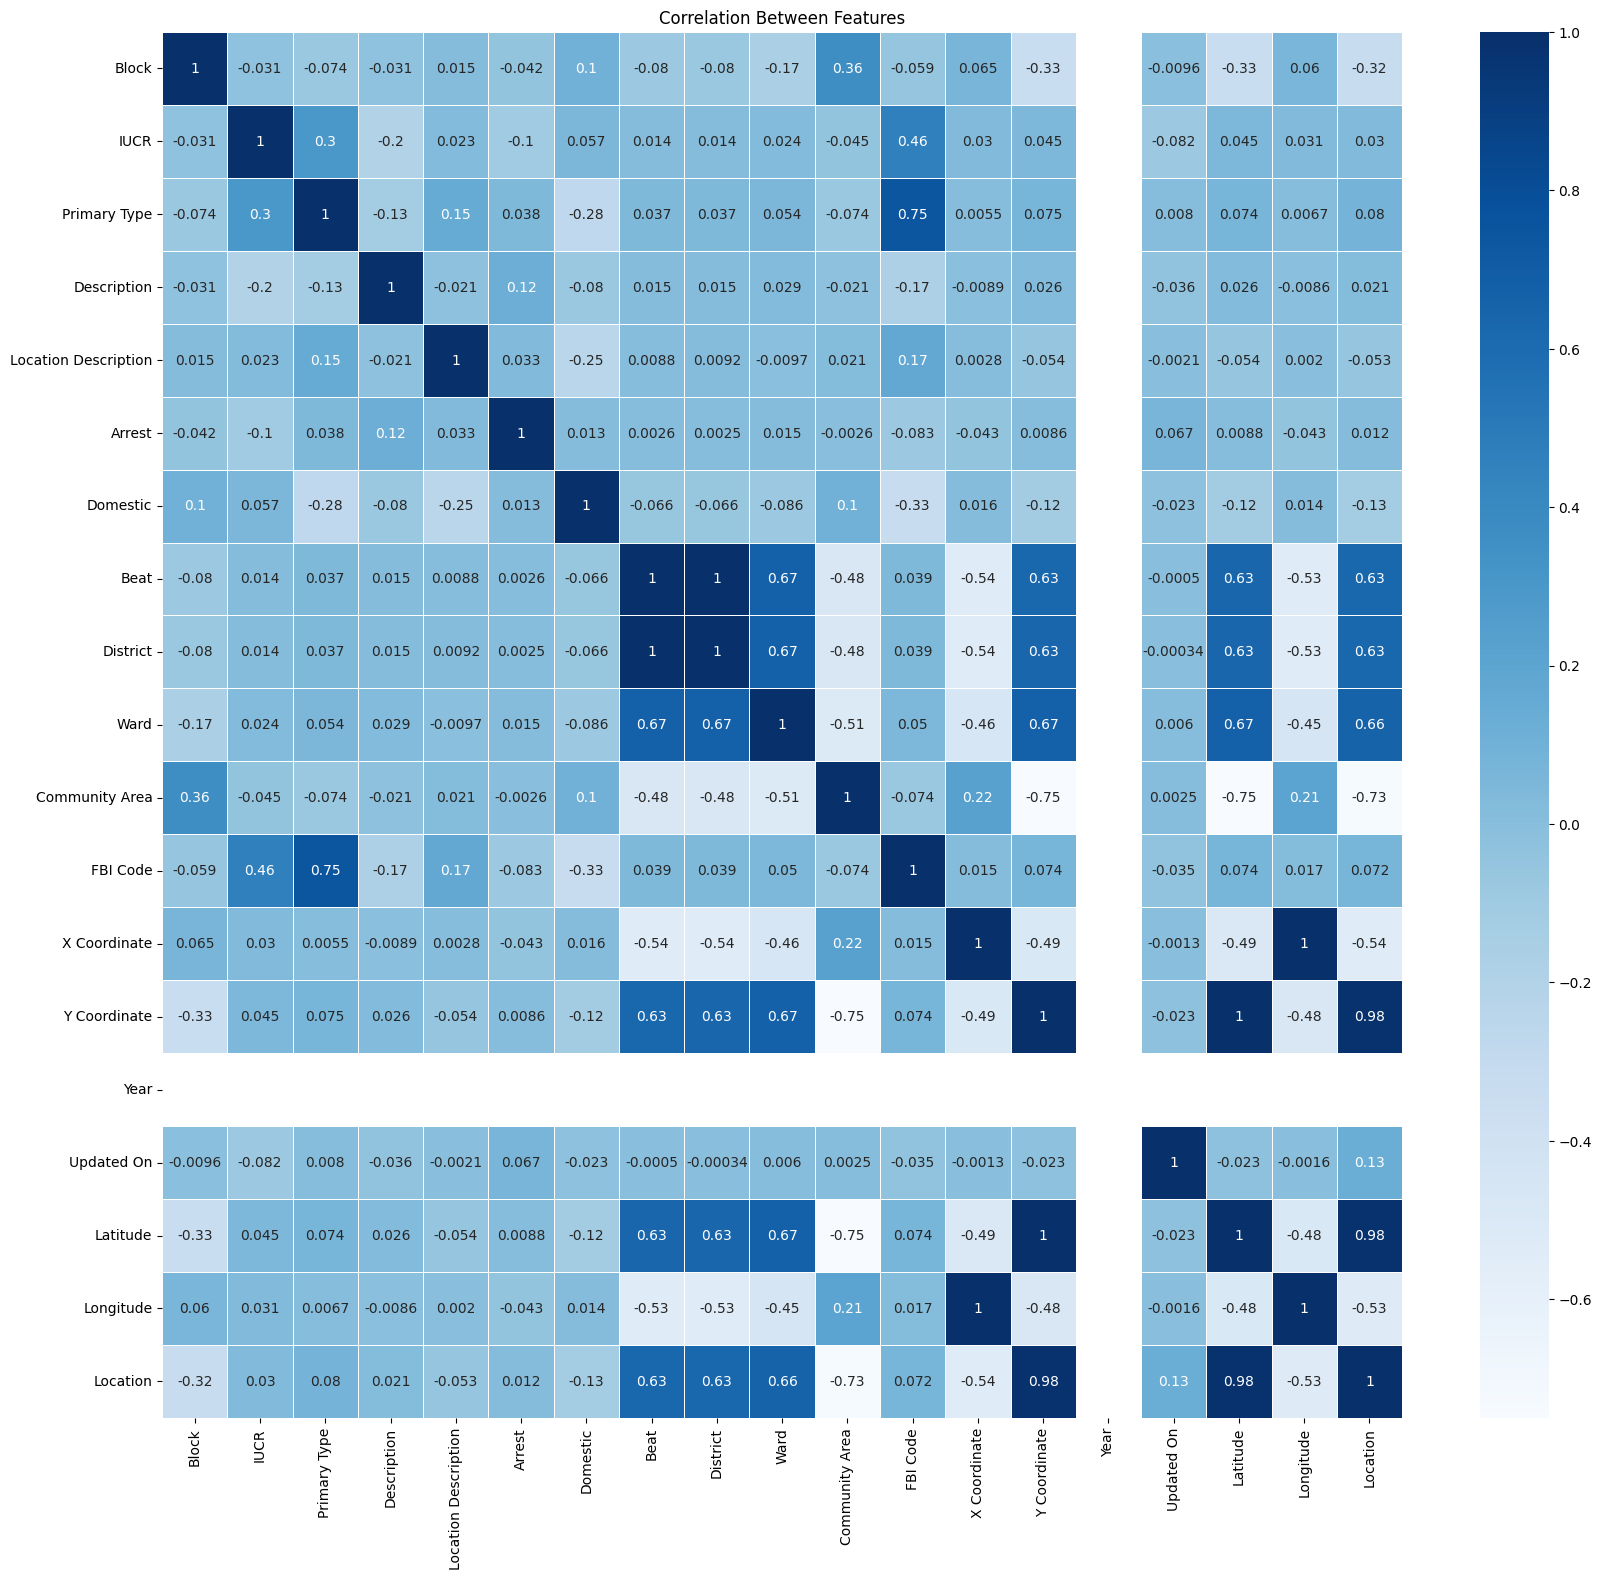

In [344]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = df.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

In [345]:
df = df.drop(columns=['Location', 'Y Coordinate', 'X Coordinate', 'FBI Code'], axis=1)


## Detecting Outliers

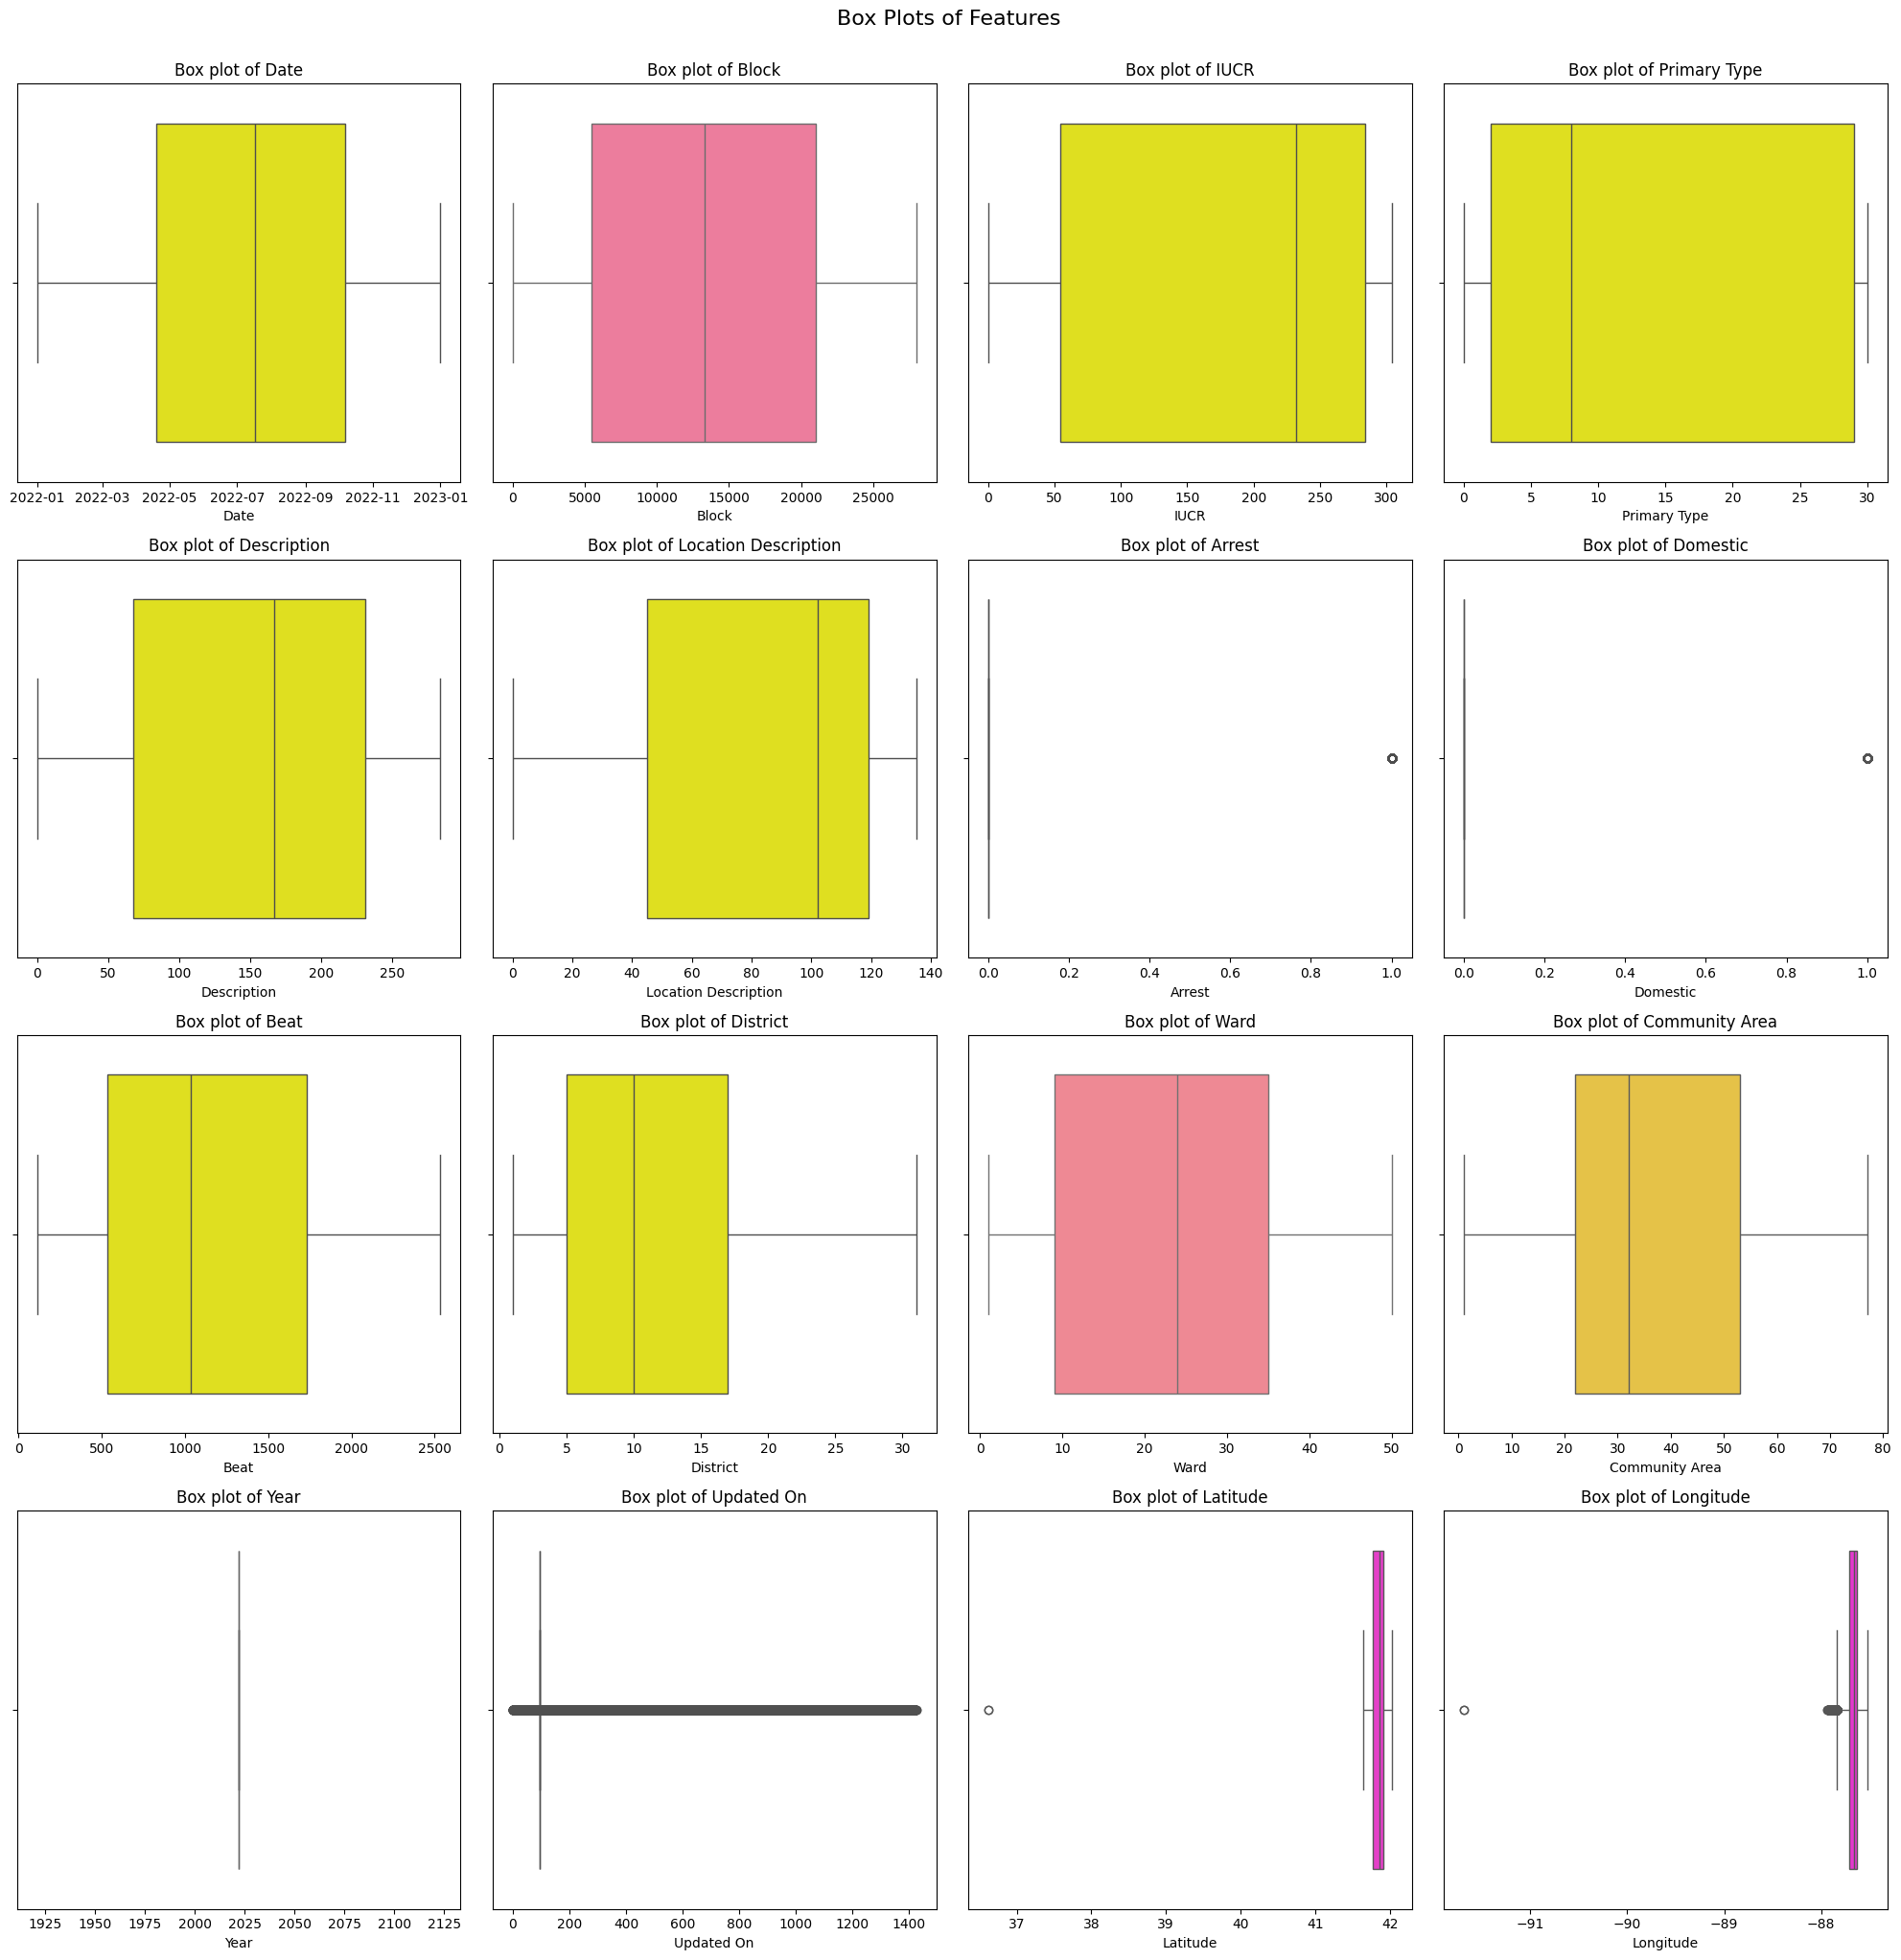

In [346]:
num_colors = 20
indices = np.linspace(0, 400, 1000, dtype=int)
np.random.shuffle(indices)
selected_indices = indices[:num_colors]
colors = [cm.spring(x) for x in selected_indices]
#Box Plot
def print_boxplot(df):
    n = len(df.columns)
    rows = int(np.ceil(n/4))

    fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

    # Flatten the axes array, to make iterating over it easier
    axs = axs.flatten()

    for i, (c, color) in enumerate(zip(df, colors)):
        sns.boxplot(x=df[c],color=color, ax=axs[i])
        axs[i].set_title(f'Box plot of {c}')

    # Remove any unused subplots
    if n % 4:
        for j in range(n, rows*4):
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
    plt.show()

print_boxplot(df)

## Feature Scaling

In [347]:
# Extract the datetime column
date_col = df['Date']

# Select the numerical columns (assuming these are the ones you want to scale)
numerical_cols = df.select_dtypes(include=[np.number])

# Create the scaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)

# (Optional) Transform the datetime column if needed (e.g., convert to timestamps)
# transformed_date_col = ...  # Your transformation logic here

# Combine the scaled/transformed columns back into a DataFrame
df = pd.concat([scaled_numerical_df, date_col], axis=1)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Block                 239558 non-null  float64       
 1   IUCR                  239558 non-null  float64       
 2   Primary Type          239558 non-null  float64       
 3   Description           239558 non-null  float64       
 4   Location Description  239558 non-null  float64       
 5   Arrest                239558 non-null  float64       
 6   Domestic              239558 non-null  float64       
 7   Beat                  239558 non-null  float64       
 8   District              239558 non-null  float64       
 9   Ward                  239548 non-null  float64       
 10  Community Area        239558 non-null  float64       
 11  Year                  239558 non-null  float64       
 12  Updated On            239558 non-null  float64       
 13 

In [352]:
X = df.drop(['Date','Arrest'], axis=1)
y = df['Arrest']

## Getting Important Features From Random Forest Classifier

In [353]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

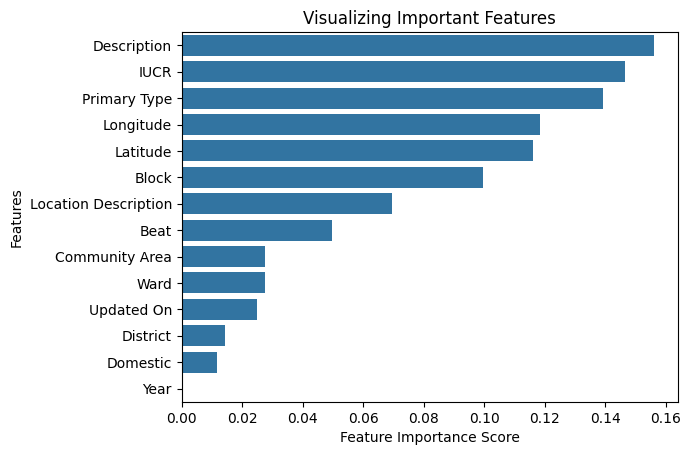

In [354]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sorted_features = feature_scores.index
sorted_scores = feature_scores.values
sns.barplot(x=feature_scores, y=feature_scores.index, orient = 'h')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")
sorted_features
# Visualize the graph
plt.show()